### Downstream Analysis 1
In this notebook, we will focus on the downstream analysis of the results we obtained from running the PRINT software. This analysis here is more micro - by looking at one region at a time. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the .npy file
data = np.load('/data/peer/panb2/replicate/result_tensor.npy')

In [3]:
data.shape

(359263, 25, 501)

In [4]:
# input: a (25,501) array, representing all data from a CRE
# output: the most likely position of the nucleosome
def get_CRE_nucleosome_position(arr):
    result = np.empty(arr.shape[0], dtype=float)
    for i, row in enumerate(arr):
        row_sum = np.sum(row)
        if row_sum == 0:
            result[i] = np.nan
        else:
            result[i] = np.argmax(row)
    return result

In [5]:
def array_stats(arr):
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    arr_mean = np.mean(arr)
    arr_median = np.median(arr)
    arr_std = np.std(arr)
    arr_variance = np.var(arr)
    arr_length = len(arr)
    print("Minimum: ", arr_min)
    print("Maximum: ", arr_max)
    print("Mean: ", arr_mean)
    print("Median: ", arr_median)
    print("Standard Deviation: ", arr_std)
    print("Variance: ", arr_variance)
    print("Length: ", arr_length)

#### Example of getting the maximum index of one cluster from one region

In [5]:
slice = data[7,19,]

In [6]:
slice.shape

(501,)

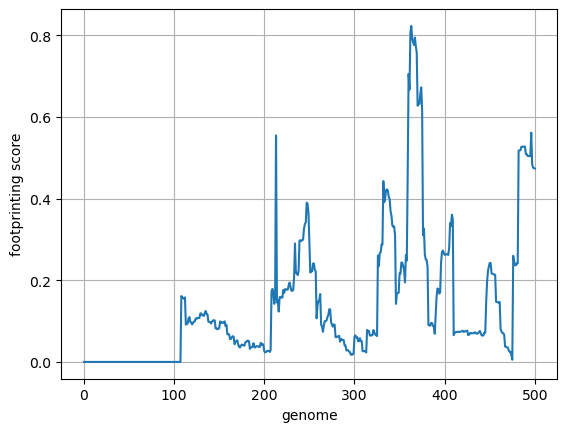

In [7]:
# Plot the array
plt.plot(slice)
plt.xlabel('genome')
plt.ylabel('footprinting score')
plt.grid(True)
plt.show()

In [8]:
slice.argmax()

363

#### Example of getting the maximum indices from region 7

In [10]:
region_7 = data[7,:,:]

In [11]:
region_7.shape

(25, 501)

In [12]:
region_7_result = get_CRE_nucleosome_position(region_7)

In [13]:
region_7_result

array([ nan, 289.,  nan,  38.,  nan,  nan, 366.,  nan,  nan, 271.,  nan,
        38.,  73., 272.,  nan, 410.,  nan,  nan,  nan, 363.,  nan,  nan,
        70.,  nan, 288.])

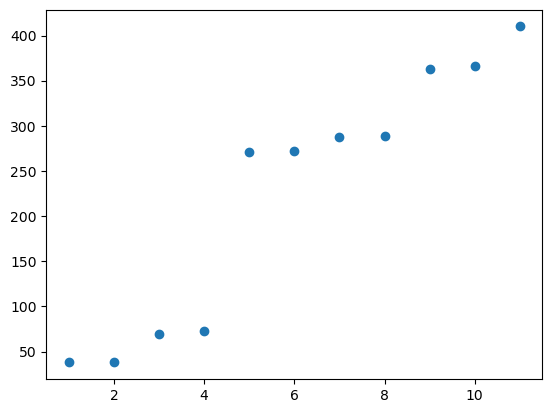

In [14]:
x = np.arange(1, 26)
y = region_7_result.sort()
plt.scatter(x, region_7_result)
plt.show()

The clusters corresponding to the neuroendocrine cells, notably cluster 12 and 13, have the nucleosome peak at 38 and 78, which is significantly more different than the possible nucleosome positions of the other clusters. 

#### Example of getting the maximum indices from region x

In [6]:
region_x = data[9,:,:]
region_x_result = get_CRE_nucleosome_position(region_x)
print(region_x_result)

[ nan 395.  nan 500.  nan 240. 133.  nan  90. 458.  nan 332. 446.  nan
 340. 282.  nan  nan 458.  nan  nan 135. 289.  nan  12.]


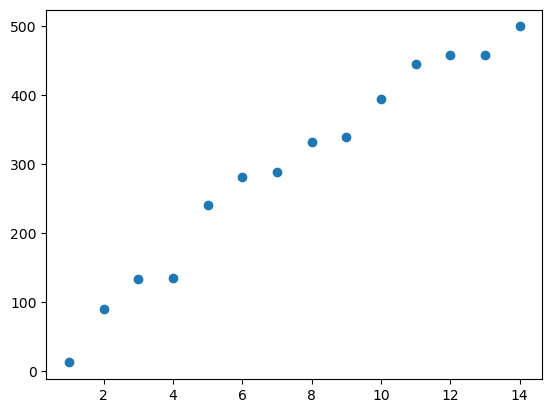

In [7]:
x = np.arange(1, 26)
y = region_x_result.sort()
plt.scatter(x, region_x_result)
plt.show()

In [8]:
region_x_result = region_x_result[~np.isnan(region_x_result)]
differences = np.diff(region_x_result)
variance = np.var(differences)

In [9]:
variance

915.6331360946745

#### Calculating variance for all CRE

In [55]:
def calculate_all_regions_variances(data):
    result = []
    for x in range(data.shape[0]):  # Loop over the first dimension
        region_x = data[x, :, :]
        region_x_result = get_CRE_nucleosome_position(region_x)
        region_x_result.sort()
        region_x_result = region_x_result[~np.isnan(region_x_result)]
        if len(region_x_result) > 5: # only return regions with 5 or more data points
            differences = np.diff(region_x_result)
            variance = np.var(differences)
        else:
            variance = np.nan
        result.append(variance)
    return result

In [56]:
result_variances = calculate_all_regions_variances(data)

In [58]:
len(result_variances)

359263

In [65]:
result_variances = np.array(result_variances)

In [73]:
result_variances_filtered = result_variances[~np.isnan(result_variances)]

In [81]:
result_variances_filtered.min()

23.5

/home/panb2/miniconda3/envs/chrom_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


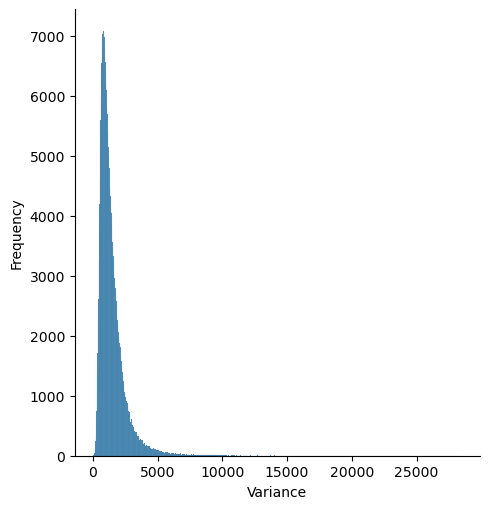

In [101]:
sns.displot(result_variances_filtered)
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

In [100]:
array_stats(result_variances_filtered)

Minimum:  23.5
Maximum:  28481.76
Mean:  1451.9131351818692
Median:  1161.5976331360946
Standard Deviation:  1089.4047729298195
Variance:  1186802.7592822716
Length:  341603


In [105]:
# finding the CRE with the smallest shift in nucleosome position
indices = np.where(result_variances == 23.5)[0]

In [106]:
indices

array([101187])

#### Visualization

In [47]:
def create_line_plots(region):
    plt.figure(figsize=(10, 6))
    colors = [
        'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray',
        'blue', 'coral', 'gray', 'gray', 'gray', 'gray', 'gray',
        'gray', 'gray', 'gray', 'gray', 'gray', 'gray',
        'gray', 'gray'
    ]
    
    for i in range(region.shape[0]):
        plt.plot(range(501), region[i], label=f'Cluster {i+1}', color=colors[i])

    plt.title('Footprint Score by Position')
    plt.xlabel('Nucleosome Position')
    plt.ylabel('Footprint Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Moving the legend out of the plot
    plt.show()

In [48]:
def visualized_region(index):  
    region_x = data[index,:,:]
    create_line_plots(region_x)
    region_x_result = get_CRE_nucleosome_position(region_x)
    print("region_x_result: ", region_x_result)
    x = np.arange(1, 26)
    region_x_result.sort()
    plt.scatter(x, region_x_result)
    plt.xlabel("clusters")
    plt.ylabel("nucleosome position")
    plt.title("Nucleosome shifting across metacells in CRE " + str(index))
    plt.ylim(0,501)
    plt.show()
    region_x_result = region_x_result[~np.isnan(region_x_result)]
    differences = np.diff(region_x_result)
    variance = np.var(differences)
    print("variance: ", variance)

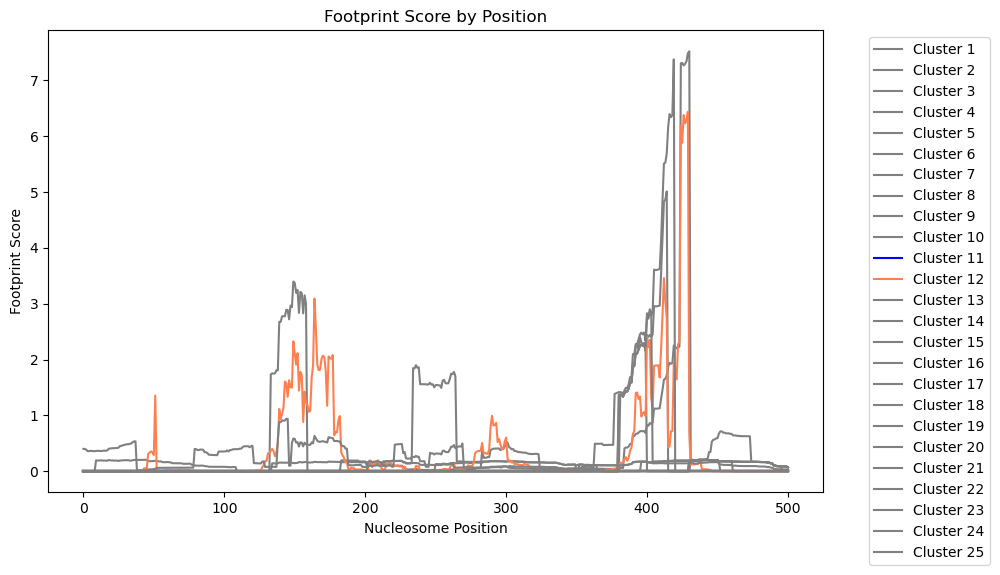

region_x_result:  [398. 414.  nan 442.  nan  nan  nan  nan 430.  nan  nan 429. 419. 442.
  nan  nan  nan  nan  nan  nan  nan  nan 442.  nan 402.]


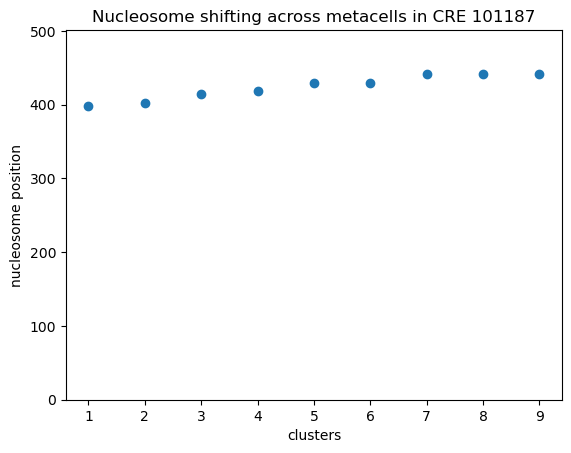

variance:  23.5


In [49]:
visualized_region(101187)

In [43]:
sorted_result_variances = np.sort(result_variances)

NameError: name 'result_variances' is not defined

In [ ]:
sorted_result_variances

In [ ]:
sorted_result_variances[:100]

region_x_result:  [ nan 405.  nan 383.  nan 263.  nan  nan 368. 418. 288. 324.  nan  nan
  nan 263.  nan  nan  nan 263.  nan 438. 336.  nan  nan]


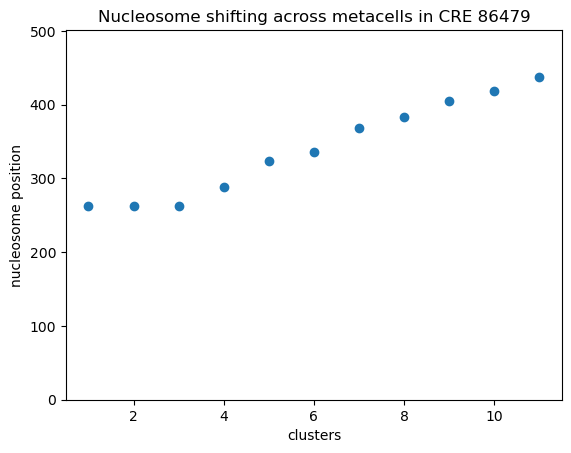

variance:  130.45


In [149]:
indices = np.where(result_variances == 130.45)[0][0]
visualized_region(indices)

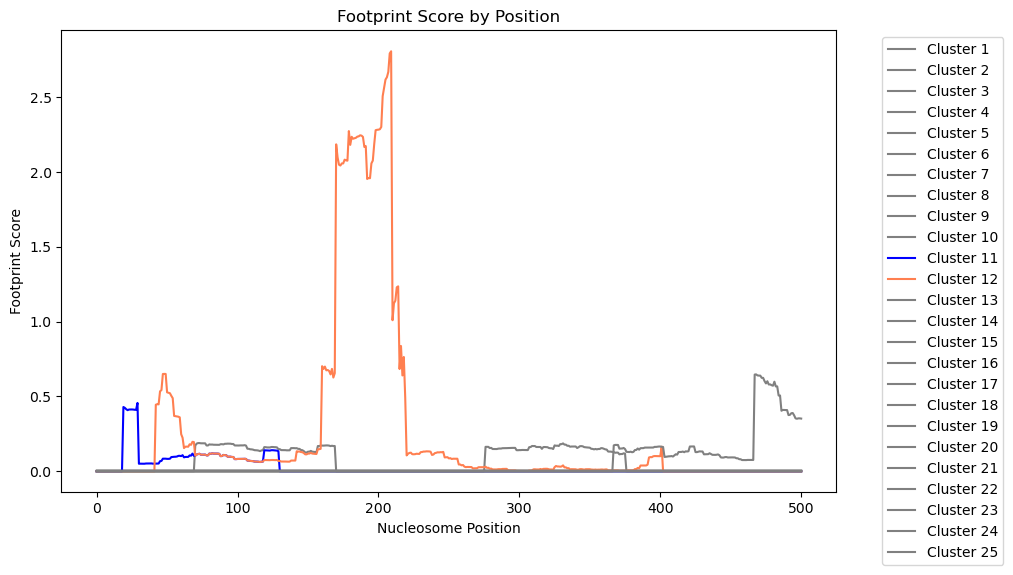

region_x_result:  [ nan  nan  nan  nan  nan  nan  nan  nan  73.  nan  29. 209.  nan  nan
  nan  nan  nan  nan  nan  nan  nan 468.  nan  nan  nan]


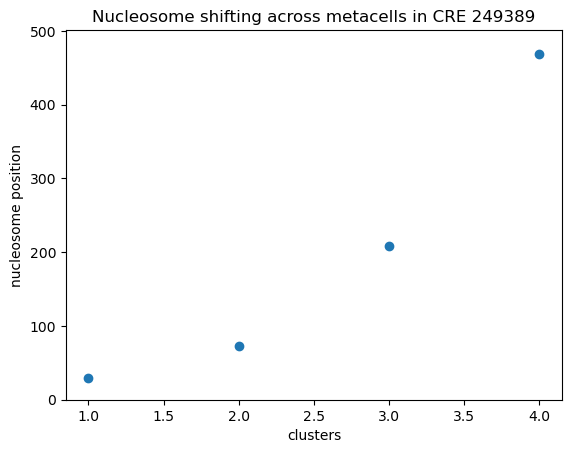

variance:  7757.555555555555


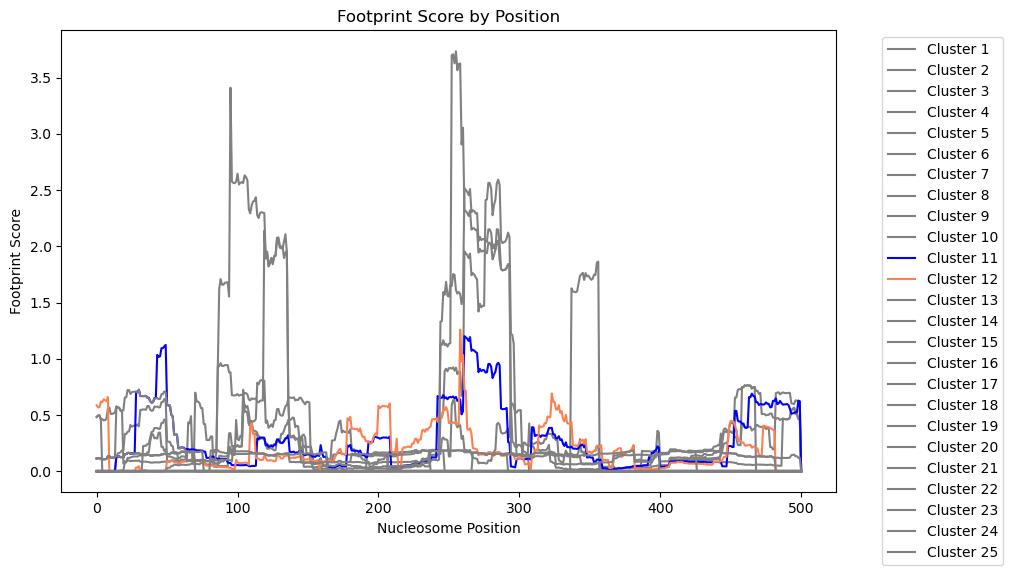

region_x_result:  [ nan 104.  nan 255.  nan  48. 238.  nan 285. 356. 261. 258.  84.  nan
  75.  nan  nan  nan  nan 409.  30.  95. 428.  nan  nan]


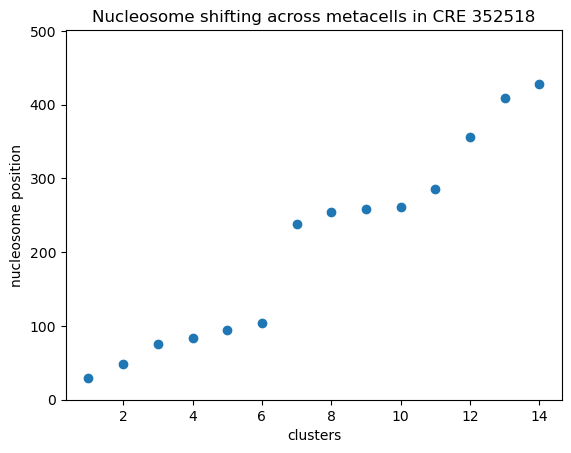

variance:  1246.2366863905327


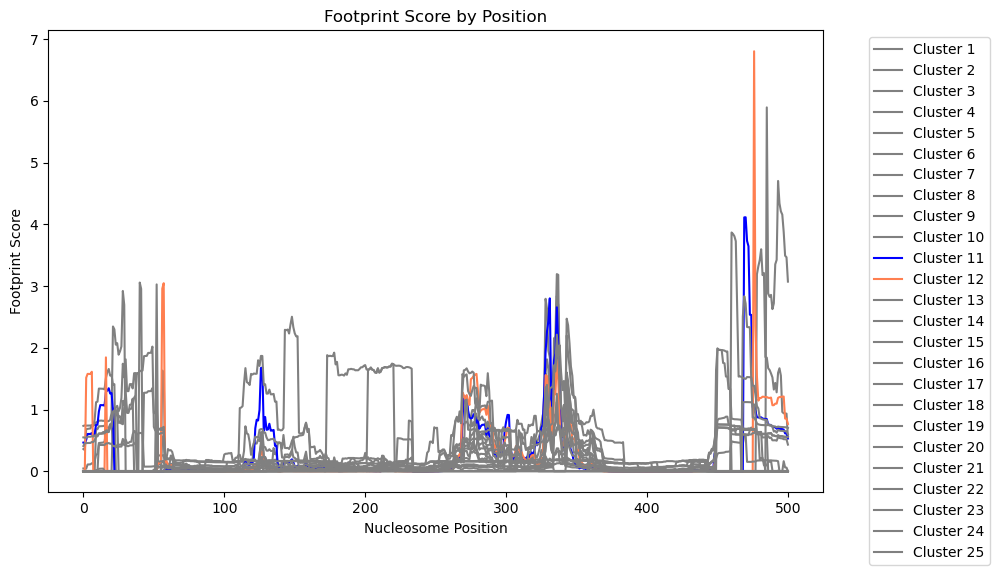

region_x_result:  [231.  28.  nan 481. 178.  49. 272. 437. 485. 336. 470. 476. 336. 279.
 450. 344. 298. 329.  nan 450. 272. 469. 460. 219. 148.]


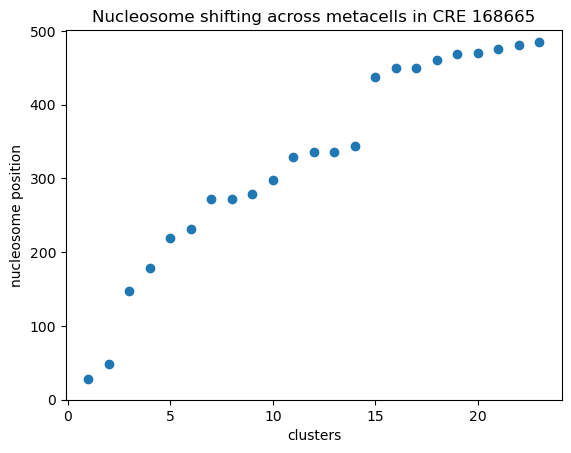

variance:  714.3574380165287


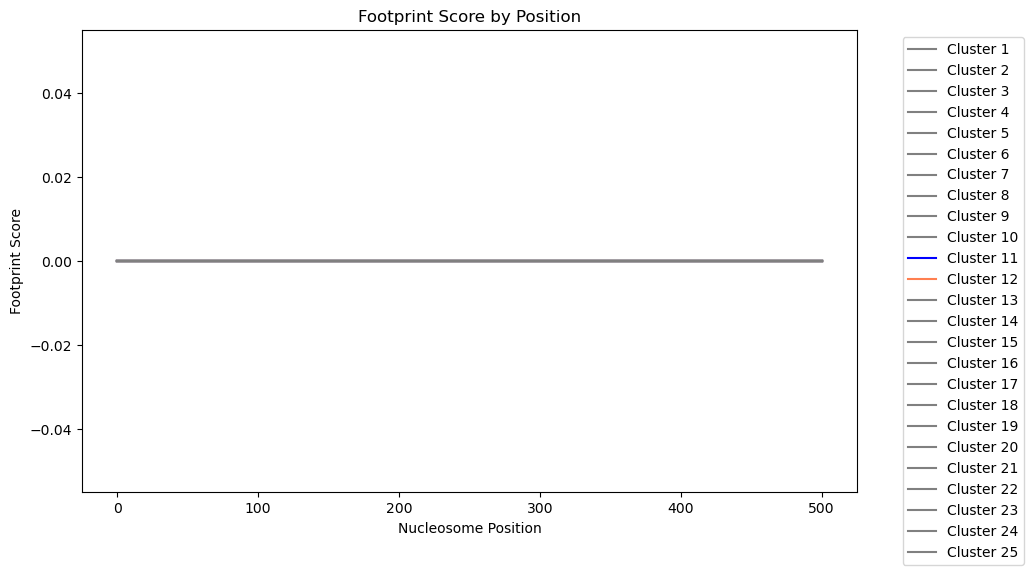

region_x_result:  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan]


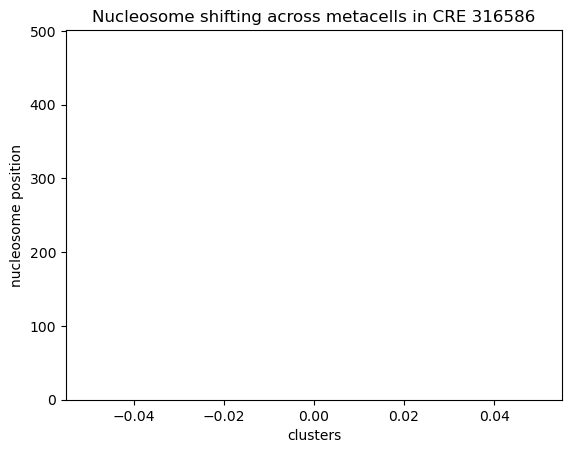

variance:  nan


/home/panb2/miniconda3/envs/chrom_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/panb2/miniconda3/envs/chrom_env/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/panb2/miniconda3/envs/chrom_env/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


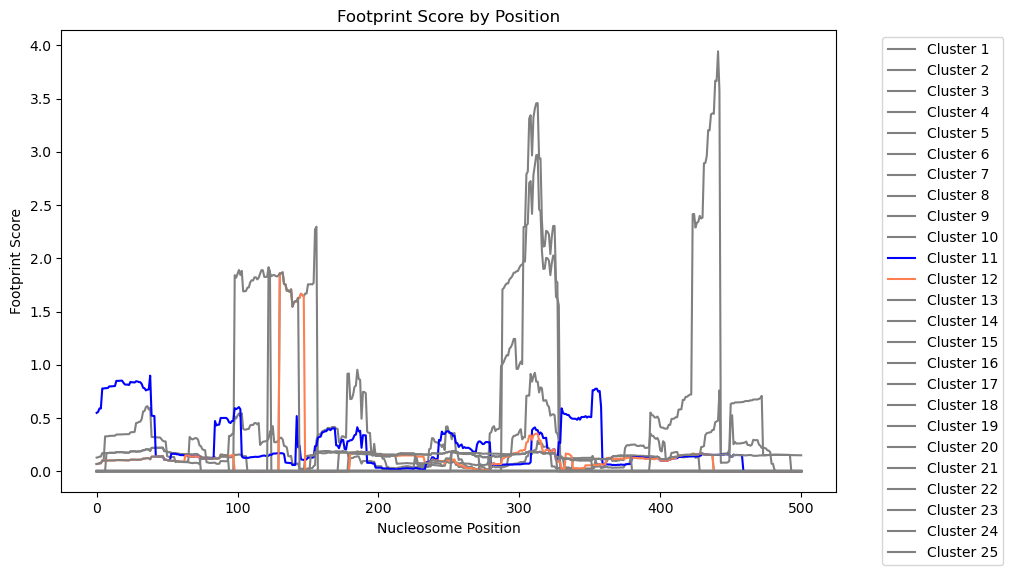

region_x_result:  [ nan 441. 313. 313.  nan  nan  nan  nan 185.  nan  38. 132.  nan  nan
 122. 254.  nan  nan  nan 309.  nan 309.  nan  nan  nan]


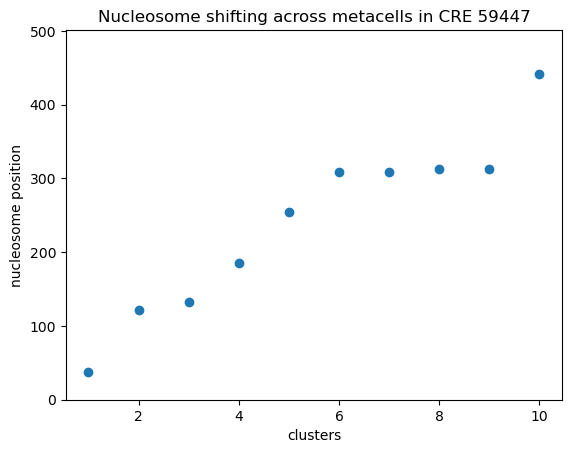

variance:  1789.5061728395065


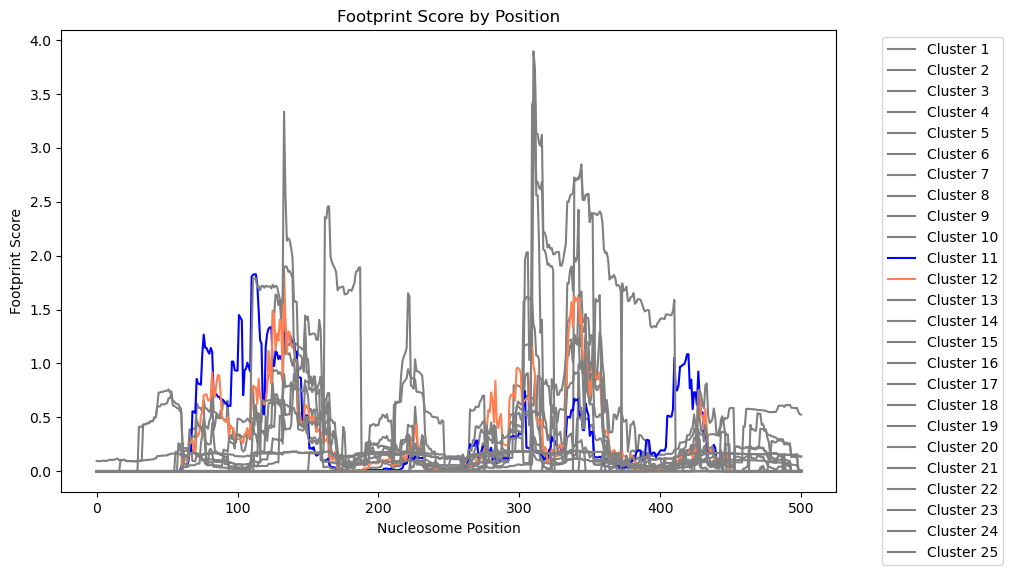

region_x_result:  [428. 133.  nan 342. 344. 306. 450. 283. 311. 344. 112. 133. 310. 165.
 357. 221.  nan 300. 133. 310. 444. 221. 134.  nan  nan]


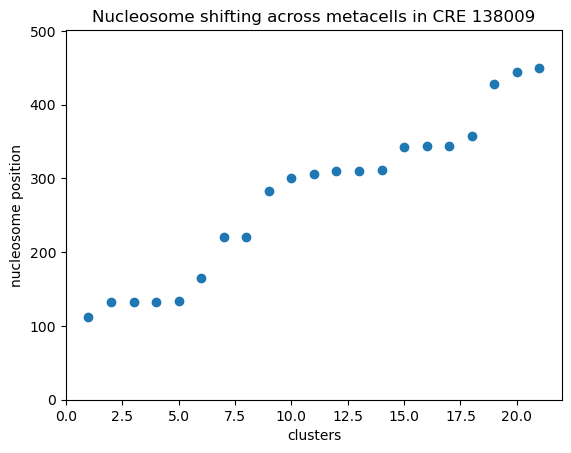

variance:  473.98999999999995


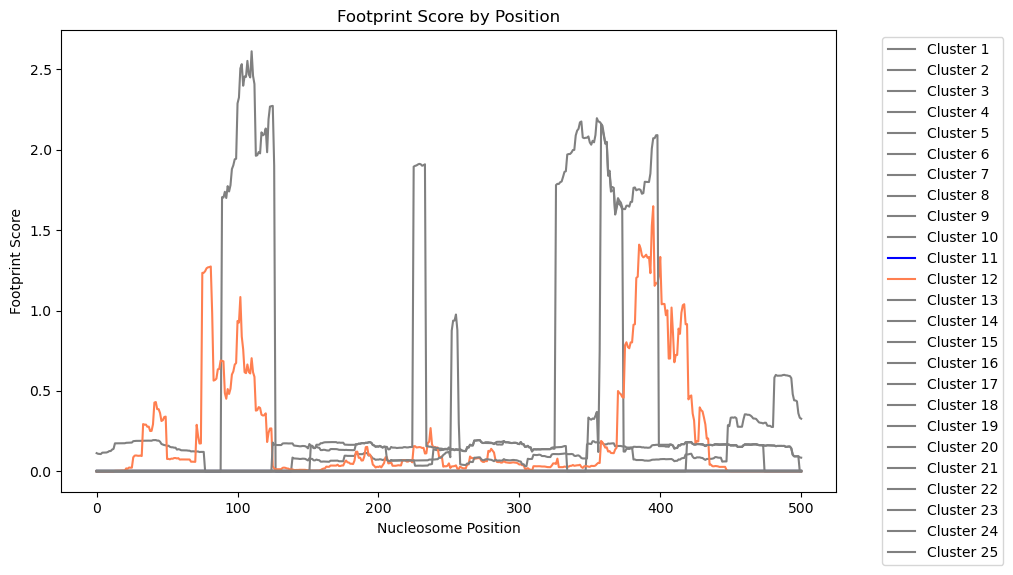

region_x_result:  [ nan 110.  nan  nan  nan 420.  nan  nan 488.  nan  nan 395. 358.  nan
  nan  nan  nan  nan  nan  nan  nan  nan 229.  nan  nan]


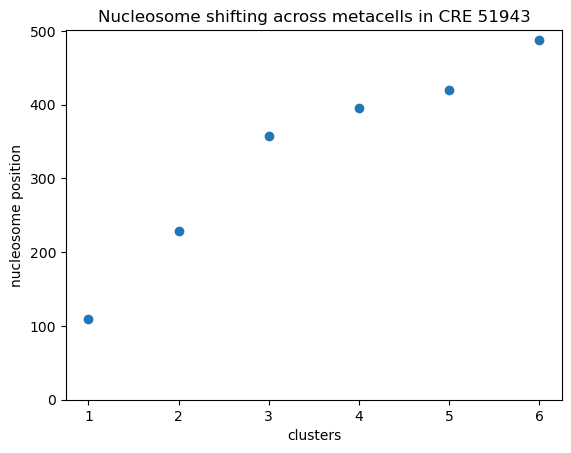

variance:  1768.6399999999999


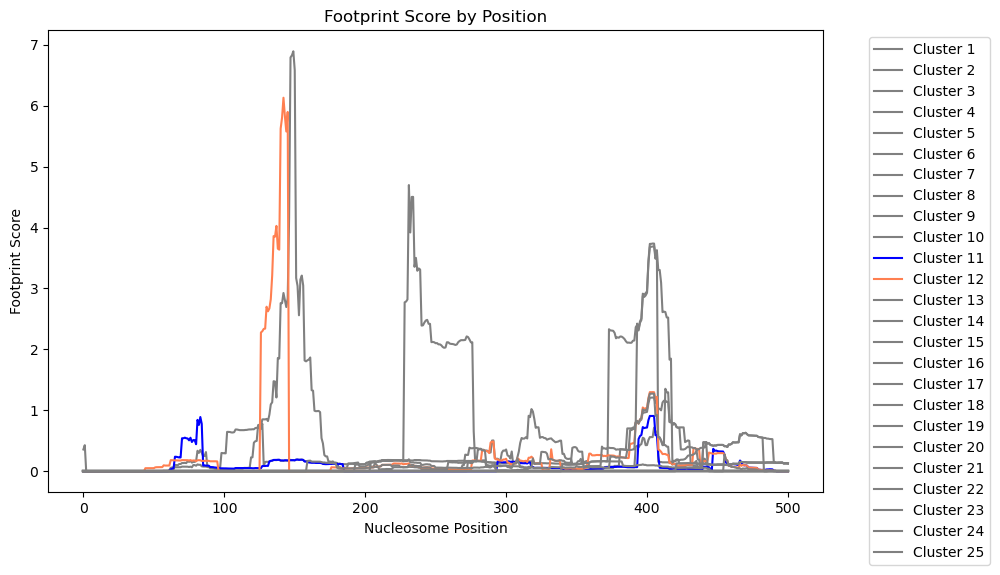

region_x_result:  [ nan 149.  nan 404.  nan  nan  nan  nan 231.  nan 404. 142.  nan  nan
 470.  nan  nan  nan  nan  nan 237. 413. 404.  nan  nan]


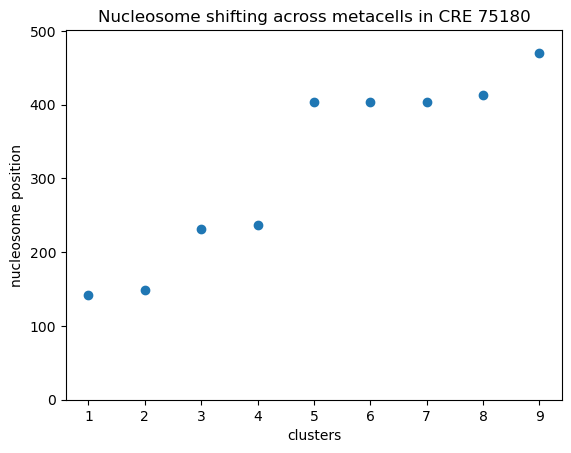

variance:  3072.5


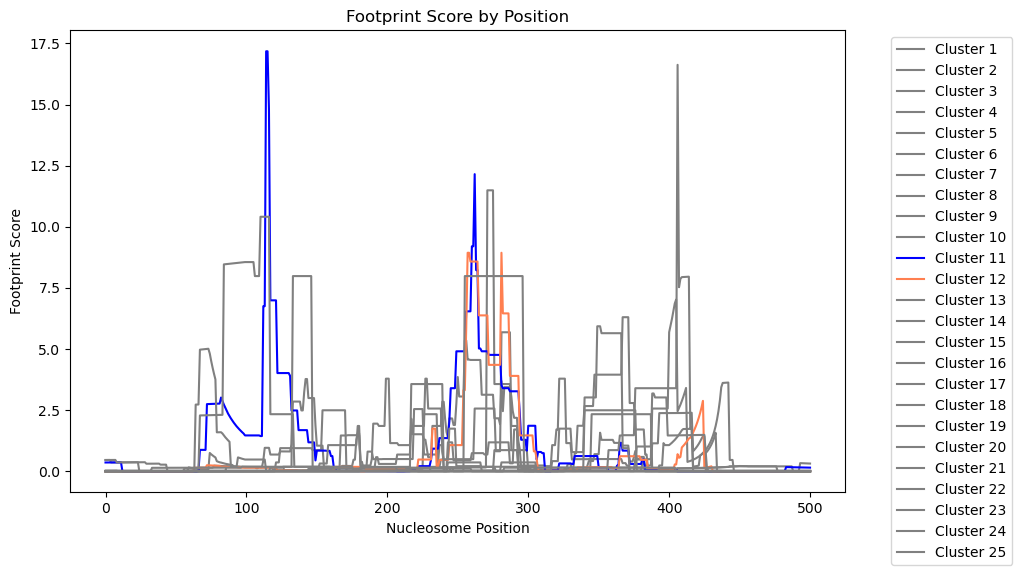

region_x_result:  [ nan 255.  nan 367.  nan 283. 345.  nan 281. 271. 114. 257. 133.  nan
 217.  nan  nan  nan  nan 110.  nan 349. 406.  nan  nan]


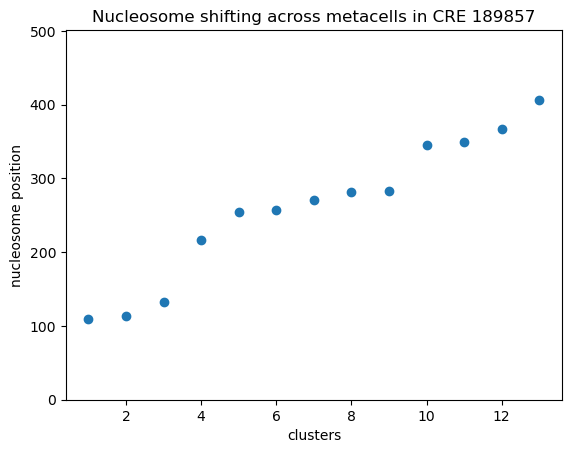

variance:  632.0555555555555


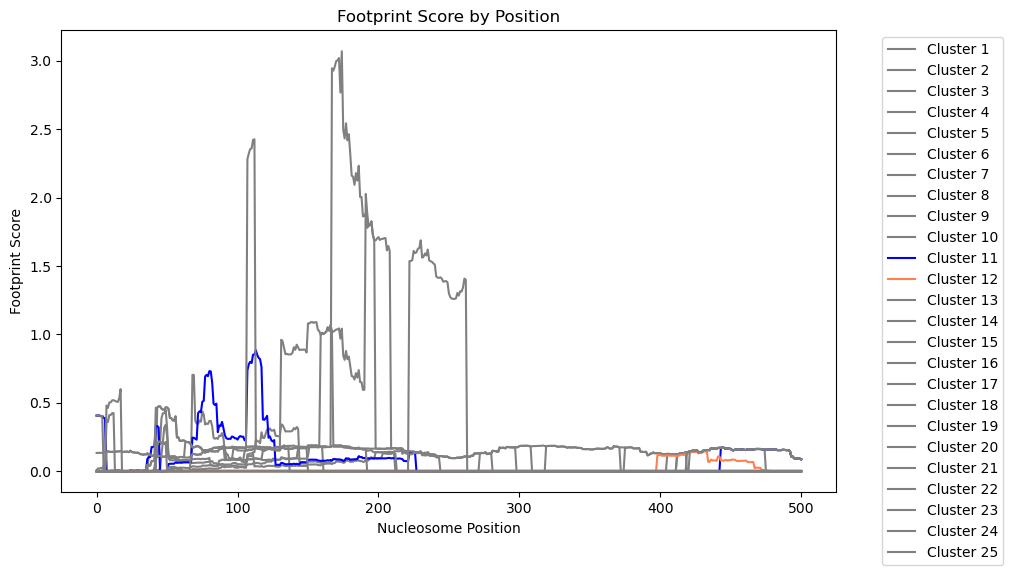

region_x_result:  [ nan  68. 445.  12.  nan 133.  nan  nan 156. 191. 113. 433.  nan   2.
 112.  nan  nan  nan  nan 174.  nan 445. 153.  nan  44.]


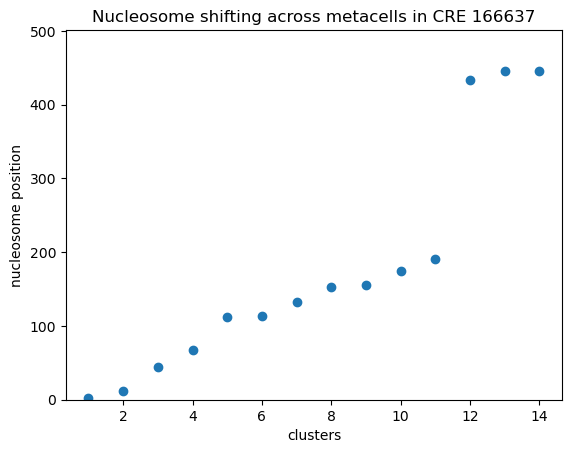

variance:  3743.917159763313


In [50]:
# Generate ten random numbers in the range 0 to 359263
random_numbers = np.random.randint(0, 359263, size=10)

# Visualize each region
for region in random_numbers:
    visualized_region(region)